In [1]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [2]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [3]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [4]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [5]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [6]:
min(probability_matrix.probability_table.values())

1.2227497980017334e-07

In [7]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [8]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
# text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
# text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
# text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [9]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text(text, cipher)
decoded_text = text_decoder.decode_text(encoded_text, cipher)

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so
Encoded Text: czvjv svjv bvccvj yvdyv kd czv yma ovpzmdkp vhvjpkyv xg avcvjokdkdu czv jvmyxd xg kcy mbyvdpv szvjv kc ky dxc kd czv dxqvry xg czv rmyc zldajva fvmjy czvjv mjv qmyc dlobvjy xg fxldu rmakvy skcz szxo kc okuzc bv m irvmyljv cx gmrr kd rxqv czvjv mjv mc rvmyc gkqv skcz szxo my kc yvvoy cx ov dx omd xg cmycv mda yikjkc pmd zvri axkdu yx
Decoded Text: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to 

In [10]:
# break the cipher with MCMC

cipher_breaker = CipherBreaker(
    starting_cipher=cipher_generator.generate_cipher(),
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=100000, print_interval=100)

Iter 0: azwiw qwiw jwaawi hwnhw fn azw hot mwvzonfv wswivfhw cp twawimfnfnl azw iwohcn cp fah ojhwnvw qzwiw fa fh nca fn azw ncuwkh cp azw koha zdntiwt gwoih azwiw oiw uoha ndmjwih cp gcdnl kotfwh qfaz qzcm fa mflza jw o ekwohdiw ac pokk fn kcuw azwiw oiw oa kwoha pfuw qfaz qzcm oh fa hwwmh ac mw nc mon cp aohaw ont hefifa von zwke tcfnl hc
Iter 100: shere were vesser tente in she tad mechanic ekercite of desermining she reaton of ist avtence where is it nos in she nopelt of she lats hundred beart shere are pats numvert of boung ladiet wish whom is mighs ve a yleature so fall in lope shere are as leats fipe wish whom at is teemt so me no man of satse and tyiris can hely doing to
Iter 200: there were better sense in the sad mechanic exercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of ta

['m',
 'b',
 'p',
 'a',
 'v',
 'g',
 'u',
 'z',
 'k',
 't',
 'i',
 'r',
 'o',
 'd',
 'x',
 'h',
 'e',
 'j',
 'y',
 'c',
 'l',
 'q',
 's',
 'n',
 'f',
 'w']

In [11]:
cipher_breaker.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

[('there were better sense in the sad mechanic ekercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so',
  -1660.4788802172998),
 ('there were yetter sense in the sad mechanic ekercise of determining the reason of its aysence where it is not in the novels of the last hundred bears there are vast numyers of boung ladies with whom it might ye a pleasure to fall in love there are at least five with whom as it seems to me no man of taste and spirit can help doing so',
  -1660.7744786856956),
 ('there were better sense in the sad mechanic eqercise of determining the reason of its absence where it is not in the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love there are at least five with wh

MovieWriter imagemagick unavailable; using Pillow instead.


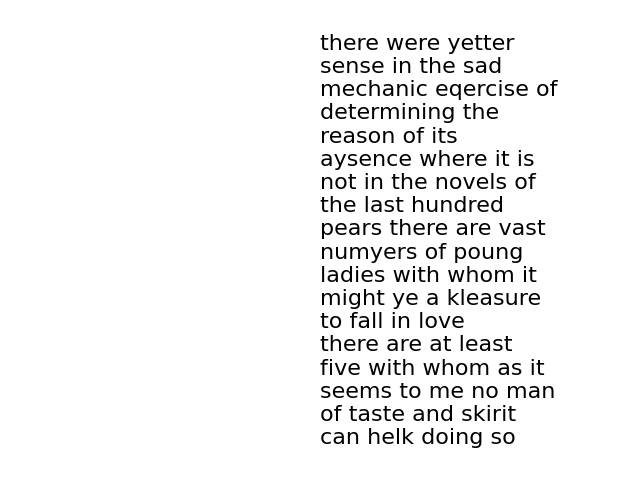

In [12]:
cipher_breaker.generate_animation(filename="there were.gif")